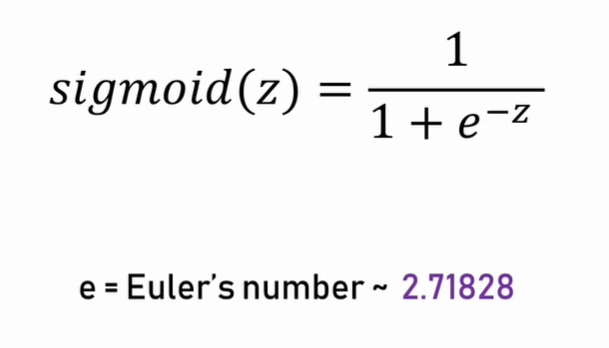

Burada yaptığımız işlem 1 değerini 1'den biraz daha büyük bir sayıya bölmek şekilinde ifade edilebilir. Bu durumda sonuç 1'den küçük olacaktır. Fonksiyon 0'dan 1'e kadar bir aralıkla gelliyor. Bu sayı kümesine Sigmoid denir.

In [42]:
import pandas as pd 

In [43]:
df = pd.read_csv(r"C:/Users/sahik/Documents/MAKINE_OGRENMESI/DATA/insurance_data.csv")
df

,age,bought_insurance
0,22,NaN
1,25,NaN
2,47,1.0
3,52,NaN
4,46,1.0
5,56,1.0
6,55,NaN
7,60,1.0
8,62,1.0
9,61,1.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               27 non-null     int64  
 1   bought_insurance  14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [45]:
df.isnull().sum()

age                  0
bought_insurance    13
dtype: int64

In [46]:
df.fillna(value=0, inplace=True)
# Logistic Regresion, sınıflandırma yapacağı bir şeylerin olması gerektiği için NAN değerlere ort değer yani 1 yerine 0 veriyoruz.

In [47]:
df.head()

,age,bought_insurance
0,22,0.0
1,25,0.0
2,47,1.0
3,52,0.0
4,46,1.0


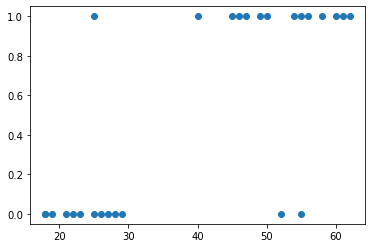

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.age, df.bought_insurance);

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df[["age"]], df.bought_insurance, test_size=0.2, random_state=10)

In [50]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

> **predict:** Regresyon, sınıflandırma, kümeleme gibi yöntemler kullanarak yapacağınız çalışmalarda **tahmin edilen etiket bilgisini** predict fonksiyonuyla elde edebilirsiniz.

> **predict_proba:** Sınıflandırma problemlerinde gözlemlerin sınıflara ait olma olasılıklarını elde etmek istiyorsanız bu fonksiyonunu kullanmanız gerekiyor.

In [51]:
reg.predict(X_test)

array([1., 1., 0., 0., 0., 0.])

In [52]:
reg.predict_proba(X_test)

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])

In [53]:
y_test

7     1.0
5     1.0
18    0.0
21    0.0
11    0.0
1     0.0
Name: bought_insurance, dtype: float64

In [54]:
reg.score(X_test, y_test)

1.0

In [55]:
reg.coef_

array([[0.11277822]])

In [56]:
reg.intercept_

array([-4.2028033])

## Formülü kullanarak sonuca ulaşalım

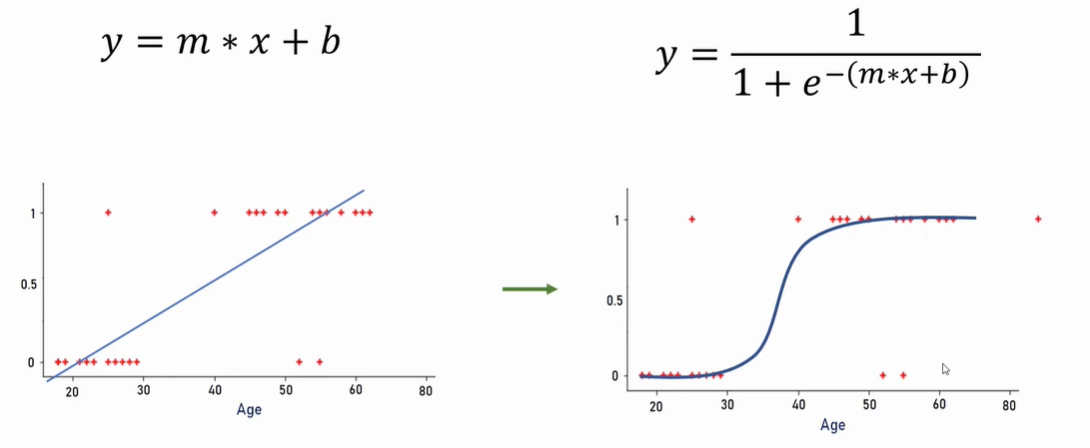

In [57]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [58]:
def prediction_function(age):
    z = 0.11 * age + -4.20
    s = sigmoid(age)
    return s

In [59]:
age = 35
prediction_function(35)

0.9999999999999993

In [60]:
age = 43
prediction_function(43)

1.0

## ÖDEV:
* Hangi değişkenlerin çalışanların elde tutulması üzerinde doğrudan ve net bir etkiye sahip olduğunu (yani şirketten ayrılıp ayrılmadıklarını veya çalışmaya devam edip etmediklerini) anlamak için bazı keşifsel veri analizleri yapın.
* Çalışan maaşlarının elde tutma üzerindeki etkisini gösteren çubuk grafikler
* Departman ve çalışanları elde tutma arasındaki ilişkiyi gösteren çubuk grafikler çizin
* Şimdi 1. adımda daraltılan değişkenleri kullanarak lojistik regresyon modeli oluşturun
* Modelin doğruluğunu ölçün

In [92]:
data = pd.read_csv("C:/Users/sahik/Documents/MAKINE_OGRENMESI/DATA/HR_comma_sep.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Hangi değişkenlerin çalışanların elde tutulması üzerinde doğrudan ve net bir etkiye sahip olduğunu (yani şirketten ayrılıp ayrılmadıklarını veya çalışmaya devam edip etmediklerini) anlamak için analiz yapalım.

In [94]:
ayrildi = data[data.left == 1]
ayrildi.shape

(3571, 10)

In [95]:
kalan = data[data.left == 0]
kalan.shape

(11428, 10)

# Tüm sütunlar için ortalama sayılar

In [96]:
data.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Satisfaction Level - Memnuniyet Düzeyi**: Firmadan ayrılan çalışanlarda (0.44) firmada kalan çalışanlarda (0.67)

**Average Monthly Hours - Aylık Ortalama Saatler**: Firmadan ayrılan çalışanlarda ortalama aylık çalışma saatleri daha yüksektir (199'a karşı 207)

**Promotion Last 5 Years - Terfi Son 5 Yıl**: Terfi verilen çalışanların firmada kalmaları muhtemeldir.

# Maaşın çalışanların elde tutulmasına etkisi

crosstab() : Çapraz tablo, üst bilgi verilerinden oluşan iki dikey liste arasında bir değer matrisi içeren genel bir tablo türüdür.

In [97]:
pd.crosstab(data.salary, data.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


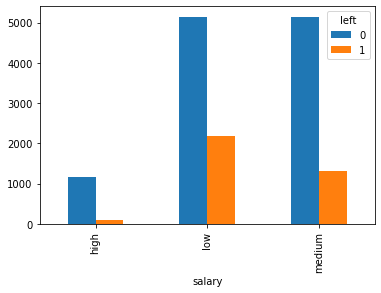

In [98]:
pd.crosstab(data.salary, data.left).plot(kind="bar");

> Yukarıdaki çubuk grafik, yüksek maaşlı çalışanların şirketten ayrılma olasılığının yüksek olduğunu göstermektedir.

### Departman bilge çalışan elde tutma oranı

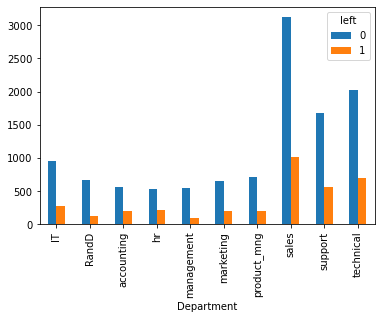

In [99]:
pd.crosstab(data.Department, data.left).plot(kind="bar");

> Yukarıdaki çizelgeden, departmanın çalışanların elde tutulması üzerinde bir miktar etkisi var gibi görünüyor, ancak bu önemli değil, bu nedenle analizimizde departmanı görmezden geleceğiz.

Şimdiye kadarki veri analizinden, modelimizde aşağıdaki değişkenleri bağımsız değişkenler olarak kullanacağımız sonucuna varabiliriz.
* **Satisfaction Level**
* **Average Monthly Hours**
* **Promotion Last 5 Years**
* **Salary**


In [103]:
subdf = data[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary"]]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [104]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
data_with_dummies = pd.concat([subdf, salary_dummies], axis=1)
data_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [110]:
data_with_dummies.drop("salary", axis=1, inplace=True)

In [111]:
X = data_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [112]:
y = data.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [118]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3)
reg = LogisticRegression()
reg.fit(Xtrain,ytrain)

LogisticRegression()

In [119]:
reg.predict(Xtest)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [121]:
reg.score(Xtest, ytest)

0.7815555555555556